## <strong> 7. NumPy 고급 기능 </strong>
+ 브로드캐스팅 (broadcasting)
+ 마스킹 (masking)
+ 팬시 인덱싱 (fancy indexing)

In [1]:
import numpy as np

### <strong> 브로드캐스팅 연산 </strong>
+ ```np.ones()```: 1로 이루어진 NumPy 배열 생성

In [2]:
# 1D + 스칼라
a = np.array([0, 1, 2])
print(a + 5)

[5 6 7]


In [3]:
# 1D + 2D 배열
a = np.ones((3, 3))      # [+] 1로 이루어진 (3, 3)의 배열 생성
print(a, '\n')

b = np.arange(0, 3)  # [+] [0, 1, 2]로 이루어진 정수 배열 생성
print(b, '\n')

print(a+b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[0 1 2] 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [4]:
# 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a.reshape(3, 1)   # [+] 차원 추가: (3,) -> (3, 1)
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

[[0]
 [1]
 [2]] 

[0 1 2] 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


### <strong> 브로드캐스팅 규칙 </strong>

In [5]:
# 예제: 1D + 2D
a = np.ones((2, 3))
b = np.arange(3)

a+b

array([[1., 2., 3.],
       [1., 2., 3.]])

In [6]:
# 예제: 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a[:, np.newaxis]
b = np.arange(3)

a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [7]:
# 예제: 브로드캐스팅이 불가능한 경우
a = np.ones((3, 2))
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

[[1. 1.]
 [1. 1.]
 [1. 1.]] 

[0 1 2] 



ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### <strong> 비교 연산, 마스크, 불리언 연산 </strong>

In [ ]:
# 배열의 비교 연산(마스킹)
x = np.array([1, 2, 3, 4, 5])

print(x < 3)
print(x >= 3)
print(x != 3)
print(x == 3)

[ True  True False False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


#### **예제: 시애틀 2014년 강수량**

In [ ]:
%pip install pandas

In [ ]:
import pandas as pd  # 데이터 조작을 위한 라이브러리

df = pd.read_csv('data/seattle2014.csv')
print(df.head())
prcp = df['PRCP'].values   # PRCP: Precipitation (강수량)
prcp = prcp / 254.0  # 인치(inch) 단위로 변환
prcp[:10]

             STATION                                STATION_NAME      DATE  \
0  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140101   
1  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140102   
2  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140103   
3  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140104   
4  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140105   

   PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  WSF2  WSF5  WT01  WT05  \
0     0     0     0    72    33    12   340   310    36    40 -9999 -9999   
1    41     0     0   106    61    32   190   200    94   116 -9999 -9999   
2    15     0     0    89    28    26    30    50    63    72     1 -9999   
3     0     0     0    78     6    27    40    40    45    58     1 -9999   
4     0     0     0    83    -5    37    10    10    67    76 -9999 -9999   

   WT02  WT03  
0 -9999 -9999  
1 -9999 -9999  
2 -9999 -9999  
3 -9

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

In [ ]:
# [+] 비가 온 날은 며칠일까?
date = df['DATE'].values
print(len(date))
date[prcp>0]

365


array([20140102, 20140103, 20140106, 20140107, 20140108, 20140109,
       20140110, 20140111, 20140112, 20140122, 20140128, 20140129,
       20140131, 20140201, 20140208, 20140209, 20140210, 20140211,
       20140212, 20140213, 20140214, 20140215, 20140216, 20140217,
       20140218, 20140219, 20140220, 20140221, 20140222, 20140223,
       20140224, 20140225, 20140301, 20140302, 20140303, 20140304,
       20140305, 20140306, 20140308, 20140309, 20140310, 20140313,
       20140314, 20140315, 20140316, 20140317, 20140319, 20140325,
       20140326, 20140327, 20140328, 20140329, 20140403, 20140405,
       20140408, 20140415, 20140416, 20140417, 20140419, 20140421,
       20140422, 20140423, 20140424, 20140426, 20140427, 20140503,
       20140504, 20140505, 20140508, 20140509, 20140510, 20140523,
       20140525, 20140612, 20140613, 20140615, 20140616, 20140617,
       20140619, 20140620, 20140627, 20140628, 20140722, 20140723,
       20140802, 20140811, 20140812, 20140813, 20140815, 20140

In [ ]:
# [+] 비가 온 날의 평균 강수량은?
mean = prcp[prcp > 0].mean()
mean

np.float64(0.32356955380577423)

In [ ]:
# [+] 0.5인치 이상 비가 온 날은 며칠?
print(len(date[prcp >= 0.5]))
date[prcp >= 0.5]

39


array([20140111, 20140129, 20140210, 20140211, 20140216, 20140217,
       20140218, 20140224, 20140302, 20140304, 20140305, 20140308,
       20140310, 20140316, 20140328, 20140329, 20140417, 20140419,
       20140422, 20140503, 20140504, 20140508, 20140723, 20140812,
       20140813, 20140923, 20140924, 20141018, 20141022, 20141028,
       20141030, 20141031, 20141121, 20141125, 20141128, 20141210,
       20141218, 20141220, 20141223])

#### **시각화 라이브러리 (seaborn) 설치**

In [ ]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.8 MB 4.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.8 MB


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 시각화 설정 코드
%matplotlib inline
import matplotlib.pyplot as plt
# seaborn은 데이터 시각화를 위한 Python 라이브러리로, 통계적 그래프를 쉽게 생성할 수 있도록 도와줍니다.
# matplotlib를 기반으로 하며, 더 세련되고 직관적인 그래프 스타일을 제공합니다.
import seaborn; seaborn.set() 
%config InlineBackend.figure_format = 'svg'

<Axes: ylabel='Count'>

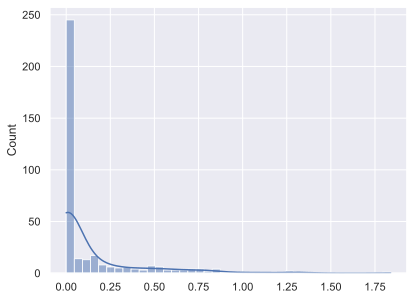

In [ ]:
import seaborn as sns

# 강수량 히스토그램 시각화
#plt.hist(prcp, 40)

# sns.histplot()는 seaborn 라이브러리의 함수로, 히스토그램을 생성하고 커널 밀도 추정(KDE)을 추가할 수 있습니다.
# prcp: 히스토그램을 생성할 데이터 (강수량 데이터)
# bins=40: 히스토그램의 막대(bin) 개수를 40개로 설정
# kde=True: 히스토그램 위에 커널 밀도 추정 곡선을 추가

# 따라서 이 코드는 강수량 데이터(prcp)에 대해 40개의 막대를 가진 히스토그램을 생성하고,
# 데이터의 분포를 나타내는 커널 밀도 추정 곡선을 함께 시각화합니다.
sns.histplot(prcp, bins=40, kde=True)

In [ ]:
# 다차원 배열의 비교 연산
np.random.seed(0)
x = np.random.randint(10, size=(3, 4))
print(x, '\n')

print(x < 6)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]] 

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


In [ ]:
# Boolean 배열 연산
print(np.count_nonzero(x < 6))  # [+] 6보다 작은가? np.count_nonzero()
print(np.sum(x < 6))            # [+] 6보다 작은가? np.sum()
print(np.any(x > 8))            # [+] 8보다 큰 값이 있는가?
print(np.all(x > 1))            # [+] 모든 값이 1보다 큰가? 

8
8
True
False


In [ ]:
# Boolean 배열을 이용한 데이터 선택
print(x, '\n')
print(x < 5, '\n')

print(x[x < 5])

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]] 

[[False  True  True  True]
 [False False  True False]
 [ True  True False False]] 

[0 3 3 3 2 4]


### <strong> 팬시 인덱싱(fancy indexing) </strong>

In [35]:
# 난수 배열 생성
np.random.seed(1)
x = np.random.randint(100, size=10)
x

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1], dtype=int32)

In [16]:
# 기본 문법: 2, 4, 6번 원소 선택하기
a = x[2]
b = x[4]
c = x[6]

print([a, b, c])

[np.int32(72), np.int32(75), np.int32(79)]


In [37]:
# 팬시 인덱싱: 2, 4, 6번 원소 선택하기
ind = [[2, 4, 6]]  # [+] 인덱스 배열 생성
print(x[ind])  # [+] 인덱스 배열을 이용한 값 선택
print(x[ind].shape)  # [+] 인덱스 배열을 이용한 값 선택

[[72 75 79]]
(1, 3)


In [23]:
# 팬시 인덱싱: 다차원 배열
np.random.seed(2)
x = np.random.randint(10, size=(3, 5))
print(x, '\n')

row = [0, 1, 2]
col = [2, 1, 4]

print(x[row, col])

[[8 8 6 2 8]
 [7 2 1 5 4]
 [4 5 7 3 6]] 

[6 2 6]


In [24]:
# 팬시 인덱싱: 다차원 배열 + 브로드캐스팅
row = np.array([0, 1, 2])
col = np.array([2, 1, 4])

x[row[:, np.newaxis], col]

array([[6, 8, 8],
       [1, 2, 4],
       [7, 5, 6]], dtype=int32)

In [25]:
# 결합 인덱싱
x = np.arange(1, 13).reshape(3, 4)
print(x, '\n')

ind = [2, 0, 1]

print(x[2, ind], '\n')
print(x[1:, [2, 0, 1]])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[11  9 10] 

[[ 7  5  6]
 [11  9 10]]


#### **예제: 팬시 인덱싱을 이용한 임의의 점 집합 선택하기**
+ ```np.random.seed()```: 난수 생성을 위한 초기상태(seed)를 관리 (전역적 상태)
+ ```np.random.RandomState()```: seed를 별도 객체에서 관리 (지역적 상태) ${\rightarrow}$ 독립적인 난수 생성기를 여러 개 생성 가능

In [ ]:
mean = [0, 0]     # 평균
# 공분산 행렬의 shape는 (2, 2)입니다. 이는 mean의 길이와 일치해야 합니다.
# mean은 [0, 0]으로 길이가 2이므로, 공분산 행렬은 2x2 대칭 행렬이어야 합니다.
# cov = [cov(x,x), cov(x,y)]
# cov = [cov(y,x), cov(y,y)]
cov = [[1, 2],    # 공분산
      [2, 5]]

rand = np.random.RandomState(1)  # RandomState: 시드를 별도 객체에서 관리
x = rand.multivariate_normal(mean, cov, 100)  # 정규분포 다변량 데이터 생성
print(x[:10])
print(x.shape)

[[-1.26659039e+00 -3.71998007e+00]
 [ 8.98574387e-01  1.00797760e+00]
 [ 8.12283322e-02 -2.29506499e+00]
 [-1.32069461e+00 -4.01236325e+00]
 [-1.99323780e-01 -7.51126722e-01]
 [-5.62429879e-01 -3.58770608e+00]
 [ 4.44845894e-01  6.58255553e-01]
 [-6.26556217e-01 -2.70315425e+00]
 [ 4.95244764e-01  2.45439522e-01]
 [-2.62034143e-01 -1.77174030e-03]]
(100, 2)


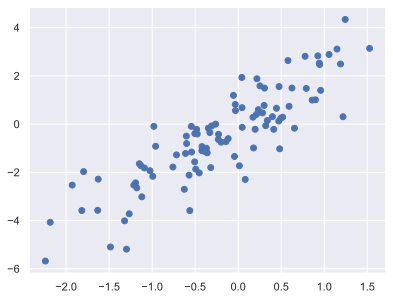

In [39]:
# 산포도 출력: scatter(x, y)
plt.scatter(x[:, 0], x[:, 1])

In [40]:
# 20개의 점을 무작위 추출(random sampling) -> 인덱스 값을 리턴
ind = np.random.choice(x.shape[0], 20, replace=False)
print(ind)

[90 44 56 82 69 64 98 58 35 38 65 91  2 99  5 53 97 94 89 42]


In [41]:
# 선택된 점 집합 출력
selected = x[ind]      # 팬시 인덱싱
print(selected)
print(selected.shape)

[[ 1.05570147  2.88807041]
 [-0.54478296 -0.09267783]
 [-0.45282799 -2.02355683]
 [-0.3906596  -1.13223305]
 [-0.75864353 -1.78112342]
 [ 0.77759124  2.81174955]
 [-0.71730549 -1.27681847]
 [ 0.6540793  -0.16981228]
 [ 1.52723792  3.14104857]
 [-0.03395656  0.81421491]
 [ 0.39825898  0.30780326]
 [-0.95977827 -0.91733211]
 [ 0.08122833 -2.29506499]
 [-1.14891234 -1.64322377]
 [-0.56242988 -3.58770608]
 [-0.31921953 -1.80294221]
 [ 0.01391107 -1.72794227]
 [-0.2313217  -0.63759661]
 [-0.50591983 -1.56754928]
 [-0.22874769 -0.42343175]]
(20, 2)


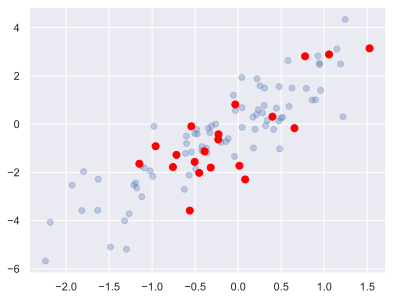

In [46]:
# 선택된 점 집합 시각화
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)    # 원본 점 집합

plt.scatter(selected[:, 0], selected[:, 1], # 선택된 점 집합
            facecolor='red', s=50)